In [1]:
import json
import pickle
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
from collections import Counter
from bs4 import BeautifulSoup
from nltk import word_tokenize
# from hltc_preprocess.tweets import clean_tweet, tokenize_tweets
from nltk.tokenize import TweetTokenizer
from spacy.lang.en import English
import operator

In [2]:
root_dir = '/home/nayeon7lee/misinfo_data'

In [3]:
! ls /home/nayeon7lee/misinfo_data/fever/train

ls: cannot access /home/nayeon7lee/misinfo_data/fever/train: No such file or directory


In [4]:
def get_sorted_unique_tokens(text_arr, tokenizer, remove_stopword=False):
    all_tokens = []
    for text in text_arr:
        tokens = tokenizer(text.lower())
        if remove_stopword:
            all_tokens.extend([t.text for t in tokens if not t.is_stop and not t.is_punct])
        else:
            all_tokens.extend([t.text for t in tokens if not t.is_punct])
        
    token_counter = Counter(all_tokens)
    sorted_token_list = sorted(token_counter.items(), key=operator.itemgetter(1), reverse=True)
    
    return sorted_token_list

In [5]:
nlp = English()
tokenizer = nlp.Defaults.create_tokenizer(nlp)

##### Load dataset

##### Clickbait SNS post

In [23]:
! ls /home/nayeon7lee/misinfo_data/clickbait/

instances.jsonl  media	truth.jsonl


In [28]:
with open('/home/nayeon7lee/misinfo_data/clickbait/truth.jsonl', 'r') as json_file:
    json_list = list(json_file)
#     clickbait_sns_text_data = [" ".join(json.loads(json_str)['postText']) for json_str in json_list]
#     clickbait_sns_target_text_data = [" ".join(json.loads(json_str)['targetParagraphs']) for json_str in json_list]
 

In [29]:
json.loads(json_list[0])

{'truthJudgments': [1.0, 1.0, 1.0, 1.0, 1.0],
 'truthMean': 1.0,
 'id': '858464162594172928',
 'truthClass': 'clickbait',
 'truthMedian': 1.0,
 'truthMode': 1.0}

In [20]:
# {"postMedia": [], "postText": ["UK\u2019s response to modern slavery leaving victims destitute while abusers go free"], "id": "858462320779026433", "targetCaptions": ["modern-slavery-rex.jpg"], "targetParagraphs": ["Thousands of modern slavery victims have\u00a0not come forward, while others who have chosen to report their enslavers have ended up destitute as a result of insufficient support, say\u00a0MPs", "\u201cInexcusable\u201d failures in the UK\u2019s system for dealing with modern slavery are\u00a0leaving victims reduced to destitution while their abusers go free because they are not adequately supported to testify against them, an alarming report has warned.", "Thousands of\u00a0victims\u00a0have not come forward, while others who have chosen to give evidence against their enslavers have ended up destitute as a result of insufficient support, according to\u00a0a report published\u00a0today by\u00a0the Work and Pensions Committee.", "It is estimated there are between 10,000 and 13,000 victims of modern slavery in the UK, but the report\u00a0warns that failings in the current mechanism mean\u00a0that once they are identified, they have no automatic formal immigration status or rights.", "Weak and uncoordinated frontline support means victims are often faced with a total lack of understanding or even recognition of their situation, which in turn has a negative impact on the number of successful prosecutions of slave masters, according to the findings.", "One, Client M, told the Committee he managed to escape from his traffickers, but it took four years before someone recognised that he was a potential victim of modern slavery. According to the report, his adviser in the Jobcentre, who knew his story, did not pick up on his situation, and it took four years before someone finally offered him the help he required.", "The report also found that no data is collected on victims once they leave the National Referral Mechanism (NRM) \u2013 the UK\u2019s framework for identifying victims of human trafficking and ensuring they receive protection and support \u2013 and that the recording of data that is collected was \u201cgenerally substandard\u201d.", "The Committee said it was \u201cunacceptable\u201d that the Government did not monitor the re-trafficking of victims and urged that reform to the NRM must include the recording of instances where victims have been processed through the framework more than once.", "As part of the inquiry, Baroness Butler-Sloss, Trustee of the Human Trafficking Foundation who helped draft the modern slavery bill in 2014, said the outcome of the NRM\u00a0process was \u201cnothing but a piece of paper\u201d to victims.", "\u201cIt is an extremely unattractive anomaly and an extremely expensive process putting a person through the NRM to get a positive outcome that everybody accepts that person is the victim of an appalling crime,\u201d she added.", "\u201cAt that stage, having spent all that money, having gone through all that process, there is no result except a piece of paper.\u201d", "Problems surrounding asylum rights were also noted in the report, in its findings that\u00a0being\u00a0a victim of slavery through the NRM confers no equivalent right to remain for any period, while\u00a0recognition as a refugee grants an initial period of five years\u2019 leave to remain in the UK.", "The damning findings come less than a year\u00a0after Theresa May announced\u00a0on entering Downing Street\u00a0that\u00a0Britain would\u00a0lead the fight against modern slavery,\u00a0calling\u00a0it \u201cthe greatest human rights issue of our time\u201d, and pledging a \u00a333m\u00a0boost to coordinating\u00a0the Government response to the issue.", "The inquiry, launched at the request of the UK\u2019s Independent Anti-Slavery Commissioner after he wrote to the Committee expressing his concerns that the support for victims of modern slavery was \u201cinadequate\u201d, made a number of urgent\u00a0recommendations.", "It suggested that all confirmed victims of modern slavery should be given at least one year\u2019s leave to remain with a personal plan for their recovery, which it said should act as a \u201csocial passport\u201d to support for at least the 12-month period of leave to remain.", "Training on how to spot signs of slavery and deal sensitively with identified victims should\u00a0be greatly improved among frontline Department for Work and Pensions (DWP) staff, who are often not aware of modern slavery, the Committee said.", "The report also urged that the Government must undertake an urgent review of the benefit support available to victims, including those who are assisting the police with investigations.", "Kate Roberts, head of office at the Human Trafficking Foundation, welcomed the findings\u00a0and said changes were \u201cmuch needed\u201d in a system that currently leaves victims of modern slavery without support and unable to unpack the trauma they\u2019ve been subjected to.", "\u201cIt\u2019s\u00a0good to see such a detailed report that really shines a light on what happens to victims after\u00a0the identification of modern slavery. I really welcome the\u00a0recommendations \u2013 they are much needed,\"\u00a0Ms Roberts told The Independent.", "\"At the moment the 'recovery period' is actually the period during which it is being\u00a0decided\u00a0whether they are victims or\u00a0not. I don't see how it is a recovery period. If\u00a0there's\u00a0so much uncertainty in your life and you've come from this extreme trauma, I don't think you can really begin to unpack that trauma and recover when you've got all the uncertainty around the corner.", "\u201cUntil now, our whole system has just focused on the identification of victims. They go through this really quite traumatic process of having to disclose what\u2019s happened to them and almost relive it, and then the decision is made that they are a victim and it doesn\u2019t really make a difference. They think now they\u2019'll be okay because the Government believes them, but in fact\u00a0it often doesn\u2019t mean anything.", "\u201cIf these recommendations\u00a0were implemented it really would change that. Many victims will take longer than a year to recover, but at least they would have time to get relevant advice\u00a0and put the necessary applications in.\u201d", "In light of the findings,\u00a0chair of the Committee\u00a0Frank Field MP\u00a0said: \u201cWhile we applaud the leading role the UK has taken in tackling this \u2018barbaric crime\u2019, as the Prime Minister has called it, when you consider what is at stake, there is a shocking lack of awareness and co-ordination in the frontline services dealing with modern slavery.", "\u201cWhat these people go through is unimaginable, and yet it is happening, here and now, and our response seems almost lackadaisical: a paper exercise earning you recognition as having been enslaved, which then entitles you to almost nothing as far as we can see.\u00a0", "\u201cWe don\u2019t even record instances where the same person is thrown back into this hell, even though that is surely the clearest sign of the failures in our response. No society worth its salt can allow this to continue, or fail to support those who fall victim.\u201d", "Mr Field urged the Prime Minister to go further in the Modern Slavery Act she brought in as Home Secretary in 2015, by conducting an urgent review and putting in place some \u201cbasic minimum safeguards\u201d in order to support victims.", "\u201cThe Prime Minister now needs to open up a further front in her Modern Slavery Act,\u201d he said.", "\u201cThe incoming Government must conduct an urgent review of our national response and put in place some basic minimum safeguards, status\u00a0that will allow a person to begin to rebuild a life, testify against their abuser if they feel able\u00a0and, above all, be protected from the unimaginable but real possibility of falling victim again.\u201d"], "targetTitle": "\u2018Inexcusable\u2019 failures in UK\u2019s response to modern slavery leaving victims destitute while abusers go free, report warns", "postTimestamp": "Sat Apr 29 23:25:41 +0000 2017", "targetKeywords": "modern slavery, Department For Work And Pensions, People Trafficking, Frank Field, Home News, UK, News", "targetDescription": "\u201cInexcusable\u201d failures in the UK\u2019s system for dealing with modern slavery are\u00a0leaving victims reduced to destitution while their abusers go free because they are not adequately supported to testify against them, an alarming report has warned."}

# postText
# targetParagraphs

with open('/home/nayeon7lee/misinfo_data/clickbait17-validation-170630/instances.jsonl', 'r') as json_file:
    json_list = list(json_file)
    clickbait_sns_text_data = [" ".join(json.loads(json_str)['postText']) for json_str in json_list]
    clickbait_sns_target_text_data = [" ".join(json.loads(json_str)['targetParagraphs']) for json_str in json_list]
    

In [21]:
json.loads(json_list[0]).keys()

dict_keys(['postMedia', 'postText', 'id', 'targetCaptions', 'targetParagraphs', 'targetTitle', 'postTimestamp', 'targetKeywords', 'targetDescription'])

In [22]:
json.loads(json_list[0])

{'postMedia': [],
 'postText': ['UK’s response to modern slavery leaving victims destitute while abusers go free'],
 'id': '858462320779026433',
 'targetCaptions': ['modern-slavery-rex.jpg'],
 'targetParagraphs': ['Thousands of modern slavery victims have\xa0not come forward, while others who have chosen to report their enslavers have ended up destitute as a result of insufficient support, say\xa0MPs',
  '“Inexcusable” failures in the UK’s system for dealing with modern slavery are\xa0leaving victims reduced to destitution while their abusers go free because they are not adequately supported to testify against them, an alarming report has warned.',
  'Thousands of\xa0victims\xa0have not come forward, while others who have chosen to give evidence against their enslavers have ended up destitute as a result of insufficient support, according to\xa0a report published\xa0today by\xa0the Work and Pensions Committee.',
  'It is estimated there are between 10,000 and 13,000 victims of modern s

In [14]:
# sorted_clickbait_sns_utokens = get_sorted_unique_tokens(clickbait_sns_text_data, tokenizer, True)
# sorted_clickbait_sns_utokens[:1000]

In [15]:
# sorted_clickbait_target_utokens = get_sorted_unique_tokens(clickbait_sns_target_text_data, tokenizer, True)
# sorted_clickbait_target_utokens[:1000]

##### BASIL

In [16]:
from os import listdir
from os.path import isfile, join

basil_path = '/home/nayeon7lee/misinfo_data/emnlp19-BASIL/data'
basil_filenames = [f for f in listdir(basil_path) if isfile(join(basil_path, f))]
basil_data_arr = []
for name in basil_filenames:
    with open('{}/{}'.format(basil_path, name), 'r') as json_file:
        basil_text_data = " ".join([sent['sentence'] for sent in json.loads(json_file.read())['body']])
    basil_data_arr.append(basil_text_data)

In [17]:
len(basil_data_arr)

300

In [18]:
# sorted_basil_utokens = get_sorted_unique_tokens(basil_data_arr, tokenizer, True)
# sorted_basil_utokens[:1000]

##### FEVER

In [19]:
with open('/home/nayeon7lee/misinfo_data/fever/train.jsonl', 'r') as json_file:
    json_list = list(json_file)
    fever_text_data = [json.loads(json_str)['claim'] for json_str in json_list]

In [20]:
len(fever_text_data)

145449

In [21]:
# sorted_fever_utokens = get_sorted_unique_tokens(fever_text_data, tokenizer, True)
# sorted_fever_utokens[:1000]

##### LIAR

In [12]:
def liar_df2objects(df):
    objs = []
    for _, row in df.iterrows():
        obj = {
            'id': row['id'],
            'label': row['label'],
            'text': row['text'],
            'subject': row['subject'],
            'speaker_info': {'speaker': row['speaker'],
                            'job': row['speaker_job'],
                            'state': row['state'],
                            'party': row['party']},
            'credibility': {'barely_true': row['barely_true'],
                            'false': row['false'],
                            'half_true': row['half_true'],
                            'mostly_true': row['mostly_true'],
                            'pants_on_fire': row['pants_on_fire']},
            'location': row['location']
        }
        objs += obj,
    return objs

def load_liar(root_dir):
    liar_train_path = '{}/{}'.format(root_dir, 'liar/train.tsv')
    liar_dev_path = '{}/{}'.format(root_dir, 'liar/valid.tsv')
    liar_test_path = '{}/{}'.format(root_dir, 'liar/test.tsv')

    liar_headers = ['id', 'label', 'text', 'subject','speaker', 'speaker_job',
                    'state','party','barely_true','false','half_true',
                    'mostly_true','pants_on_fire','location']

    liar_train = pd.read_csv(liar_train_path, sep='\t', names=liar_headers)
    liar_dev = pd.read_csv(liar_dev_path, sep='\t', names=liar_headers)
    liar_test = pd.read_csv(liar_test_path, sep='\t', names=liar_headers)

    return liar_df2objects(liar_train) + liar_df2objects(liar_dev) + liar_df2objects(liar_test)

In [23]:
liar_data = load_liar(root_dir)
liar_data_text = [d['text'].lower() for d in liar_data]
# sorted_liar_utokens = get_sorted_unique_tokens(liar_data_text, tokenizer, True)

In [24]:
# sorted_liar_utokens[:1000]

##### Webis

In [15]:
def load_webis(annotation_path, articles_path):
    # overview: XML,portal,orientation,veracity,url
    annotation_df = pd.read_csv(annotation_path)
    webis_data = []
    for _, anno in annotation_df.iterrows():
        # read xml file
        article = {}
        article['id'] = anno['XML']
        article['portal'] = anno['portal']
        article['political_orientation'] = anno['orientation']
        article['veracity_label'] = anno['veracity']
        with open("{}/{}".format(articles_path, anno['XML'])) as fp:
            xml = BeautifulSoup(fp)

            article['text'] = xml.find('maintext').text.encode('utf8').decode('utf8')
            article['author'] = xml.find('author').text
            article['title'] = xml.find('title').text

            hls = xml.find_all('hyperlink')
            hls_array = []
            for hl in hls:
                hl_obj = { 'start': hl.find('start').string,
                        'end': hl.find('end').string }
                if 'href' in hl.attrs.keys():
                    hl_obj['href'] = hl['href']
                hls_array += hl_obj,
            article['hyperlinks'] = hls_array

            paragraph_spans = xml.find_all('paragraph')
            ps_array = []
            for ps in paragraph_spans:
                ps_array += (ps.find('start').string, ps.find('end').string),
            article['paragraph_spans'] = ps_array

            quote_spans = xml.find_all('quote')
            quote_array = []
            for quote in quote_spans:
                quote_array += (quote.find('start').string, quote.find('end').string),
            article['quote_spans'] = quote_array

        webis_data += article,

    return webis_data

webis_annotation = os.path.join(root_dir, 'webis/overview.csv')
webis_article_path = os.path.join(root_dir, 'webis/articles')
webis_articles = load_webis(webis_annotation, webis_article_path)

In [33]:
webis_articles[0]

{'id': '0000.xml',
 'portal': 'abc',
 'political_orientation': 'mainstream',
 'veracity_label': 'mostly true',
 'text': 'With the Hillary Clinton-Donald Trump debates upon us, the quadrennial question comes begging: Do these showdowns matter? The chances for impact seem ripe this year. The two most unpopular major-party candidates in the history of ABC News/Washington Post polls are facing off. Donald Trump\'s unorthodox campaign style and provocative positions have piqued public interest; the debates may be the single best opportunity for him to allay concerns about his qualifications, temperament and policy promises alike. Hillary Clinton, for her part, needs -– like Trump -– to ease questions about her trustworthiness, as well as to spark greater enthusiasm among her supporters. Can either candidate move the needle? It will be tough: A review of data since 1960 suggests that past debates have almost never directly and measurably changed the candidates\' relative standings. That\'s a

In [26]:
webis_text_arr = [article['text'].encode('utf8').decode('utf8') for article in webis_articles]
# sorted_webis_utokens = get_sorted_unique_tokens(webis_text_arr, tokenizer, True)

In [27]:
# sorted_webis_utokens[:1000]

##### Rumour

In [28]:
with open("utils/id2text.pickle", "rb") as input_file: 
    id2text = pickle.load(input_file)
rumour_text_arr = list(id2text.values())
# sorted_rumour_utokens = get_sorted_unique_tokens(rumour_text_arr, tokenizer, True)

In [29]:
# sorted_rumour_utokens[:100]

## Analysis!

Some things to look for:

- mutually exclusive unique top words (try different level of strictness. increasing the number of tasks for one mutual exclusive test will increase the strictness.)
- overlap between unique top words
- overlap between all words in general (not just top words. look for whole %) 
- unique top words
- emotion words
- other linguistic features


- amongst different misinfo
- between NLU tasks and misinfo
- compared to other aux tasks


In [146]:
# count overlap percentage
def get_overlap_percentages_2(A, B, min_freq=0):
    A = [w for w, freq in A if freq>=min_freq]
    B = [w for w, freq in B if freq>=min_freq]

        
    setA, setB = set(A), set(B)

    print("Set A: ", len(setA))
    print("Set B: ", len(setB))
   
    AB_intersection = (setA.intersection(setB))
    
    print("all intersection", len(AB_intersection))

    print("Set A overlap: ", len(AB_intersection)/len(setA))
    print("Set B overlap: ", len(AB_intersection)/len(setB))

In [238]:
# count overlap percentage
def get_overlap_percentages(dataset_arr, min_freq=0, match_size=False):
    
    new_dataset_arr = []
    for dataset in dataset_arr:
        new_dataset_arr.append([w for w, freq in dataset if freq>=min_freq])

    if match_size:
        min_size = min(map(len, new_dataset_arr))
        new_dataset_arr = [dataset[:min_size] for dataset in new_dataset_arr]
        
    dataset_sets = [set(dataset) for dataset in new_dataset_arr]

    if not match_size:
        for idx, dataset in enumerate(dataset_sets):
            print("Dataset {}: {}".format(idx, len(dataset)))
   

    all_intersection = set.intersection(*dataset_sets)
    
    
    if not match_size:
        print("all intersection", len(all_intersection))
        for idx, dataset in enumerate(dataset_sets):
            print("Dataset {} Overlap: {}".format(idx, len(all_intersection)/len(dataset)))
    else:
        print(len(all_intersection))
        print(min_size)
        print("Overlap: ", len(all_intersection)/min_size)

In [211]:
# # count overlap percentage
# def get_overlap_percentages(A, B, C, min_freq=0, match_size=False):
#     A = [w for w, freq in A if freq>=min_freq]
#     B = [w for w, freq in B if freq>=min_freq]
#     C = [w for w, freq in C if freq>=min_freq]

#     if match_size:
#         min_size = min([len(A), len(B), len(C)])
#         A = A[:min_size]
#         B = B[:min_size]
#         C = C[:min_size]
        
#     setA, setB, setC = set(A), set(B), set(C)

#     if not match_size:
#         print("Set A: ", len(setA))
#         print("Set B: ", len(setB))
#         print("Set C: ", len(setC))
   
#     AB_intersection = (setA.intersection(setB))
#     all_intersection = AB_intersection.intersection(setC)
    
#     if not match_size:
#         print("all intersection", len(AB_intersection))

#         print("Set A overlap: ", len(all_intersection)/len(setA))
#         print("Set B overlap: ", len(all_intersection)/len(setB))
#         print("Set C overlap: ", len(all_intersection)/len(setC))
#     else:
#         print("Overlap: ", len(all_intersection)/len(setA))

In [212]:
min_f = 3

##### Overlap between dataset by capping smallest ds's size

In [240]:
print("Webis vs BASIL")
get_overlap_percentages([sorted_webis_utokens, sorted_basil_utokens], min_f, False)

Webis vs BASIL
Dataset 0: 14368
Dataset 1: 5330
all intersection 4836
Dataset 0 Overlap: 0.3365812917594655
Dataset 1 Overlap: 0.9073170731707317


In [239]:
print("Webis vs BASIL")
get_overlap_percentages([sorted_webis_utokens, sorted_basil_utokens], min_f, True)

Webis vs BASIL
3641
5330
Overlap:  0.6831144465290807


In [223]:
print("Webis vs BASIL vs Clickbait")
get_overlap_percentages([sorted_webis_utokens, sorted_basil_utokens, sorted_clickbait_sns_utokens], min_f, True)

Webis vs BASIL vs Clickbait
Overlap:  0.47373358348968103


In [216]:
print("BASIL vs Clickbait vs Liar")
get_overlap_percentages([sorted_basil_utokens, sorted_clickbait_sns_utokens, sorted_liar_utokens], min_f, True)

BASIL vs Clickbait vs Liar
Overlap:  0.4195121951219512


In [214]:
print("Webis vs BASIL vs Clickbait vs Liar")
get_overlap_percentages([sorted_webis_utokens, sorted_basil_utokens, sorted_clickbait_sns_utokens, sorted_liar_utokens], min_f, True)

Webis vs BASIL vs Clickbait vs Liar
Overlap:  0.3900562851782364


In [224]:
print("Webis vs BASIL vs Clickbait vs Liar vs Rumour")
get_overlap_percentages([sorted_webis_utokens, sorted_basil_utokens, sorted_clickbait_sns_utokens, sorted_liar_utokens, sorted_rumour_utokens], min_f, True)

Webis vs BASIL vs Clickbait vs Liar vs Rumour
Overlap:  0.27786116322701687


In [225]:
print("Webis vs BASIL vs Clickbait vs Liar vs FEVER")
get_overlap_percentages([sorted_webis_utokens, sorted_basil_utokens, sorted_clickbait_sns_utokens, sorted_liar_utokens, sorted_fever_utokens], min_f, True)

Webis vs BASIL vs Clickbait vs Liar vs FEVER
Overlap:  0.22795497185741087


In [226]:
print("Webis vs BASIL vs Clickbait vs Liar vs FEVER vs Rumour")
get_overlap_percentages([sorted_webis_utokens, sorted_basil_utokens, sorted_clickbait_sns_utokens, sorted_liar_utokens, sorted_fever_utokens, sorted_rumour_utokens], min_f, True)

Webis vs BASIL vs Clickbait vs Liar vs FEVER vs Rumour
Overlap:  0.1699812382739212


In [142]:
print("Liar vs FEVER vs Rumour")
get_overlap_percentages([sorted_liar_utokens, sorted_fever_utokens, sorted_rumour_utokens], min_f, True)

Liar vs FEVER vs Rumour
Overlap:  0.2091891891891892


In [227]:
print("FEVER vs Rumour")
get_overlap_percentages([sorted_fever_utokens, sorted_rumour_utokens], min_f, True)

FEVER vs Rumour
Overlap:  0.30490463215258856


##### Overlap between dataset w/o cap

In [130]:
print("Liar vs FEVER vs Rumour")
get_overlap_percentages(sorted_liar_utokens, sorted_fever_utokens, sorted_rumour_utokens, min_f, True)

Liar vs FEVER vs Rumour
Set A:  5550
Set B:  14680
Set C:  24917
all intersection 3617
Set A overlap:  0.5432432432432432
Set B overlap:  0.20538147138964577
Set C overlap:  0.12100172572942168


In [91]:
print("FEVER vs Webis vs Rumour")
get_overlap_percentages(sorted_fever_utokens, sorted_webis_utokens, sorted_rumour_utokens, min_f)

FEVER vs Webis vs Rumour
Set A:  21600
Set B:  30935
Set C:  96341
all intersection 11117
Set A overlap:  0.40162037037037035
Set B overlap:  0.28042670114756746
Set C overlap:  0.09004473692405103


In [66]:
print("Liar vs Webis vs Rumour")
get_overlap_percentages(sorted_liar_utokens, sorted_webis_utokens, sorted_rumour_utokens, min_f)

Liar vs Webis vs Rumour
Set A:  13899
Set B:  30935
Set C:  96341
all intersection 9817
Set A overlap:  0.5760846104036261
Set B overlap:  0.25883303701309196
Set C overlap:  0.08311103268598001


##### 2 dataset comparison

In [157]:
min_f=3

In [158]:
print("Liar vs Rumour")
get_overlap_percentages_2(sorted_liar_utokens, sorted_rumour_utokens, min_f)

Liar vs Rumour
Set A:  5550
Set B:  24917
all intersection 3922
Set A overlap:  0.7066666666666667
Set B overlap:  0.15740257655415982


In [159]:
print("Liar vs Webis")
get_overlap_percentages_2(sorted_liar_utokens, sorted_webis_utokens, min_f)

Liar vs Webis
Set A:  5550
Set B:  14368
all intersection 4602
Set A overlap:  0.8291891891891892
Set B overlap:  0.3202951002227171


In [160]:
print("Rumour vs Webis")
get_overlap_percentages_2(sorted_rumour_utokens, sorted_webis_utokens, min_f)

Rumour vs Webis
Set A:  24917
Set B:  14368
all intersection 8262
Set A overlap:  0.33158084841674357
Set B overlap:  0.5750278396436526


In [161]:
print("Liar vs FEVER")
get_overlap_percentages_2(sorted_liar_utokens, sorted_fever_utokens, min_f)

Liar vs FEVER
Set A:  5550
Set B:  14680
all intersection 3617
Set A overlap:  0.6517117117117117
Set B overlap:  0.24638964577656675


In [162]:
print("Rumour vs FEVER")
get_overlap_percentages_2(sorted_rumour_utokens, sorted_fever_utokens, min_f)

Rumour vs FEVER
Set A:  24917
Set B:  14680
all intersection 5823
Set A overlap:  0.23369587028936067
Set B overlap:  0.39666212534059947


##### Common interaction between Liar, Webis, Rumour

In [48]:
def get_unique_intersect_3(A, B, C):

    setA = set([w for w, _ in A])
    setB = set([w for w, _ in B])
    setC = set([w for w, _ in C])

    all_intersection = (setA.intersection(setB)).intersection(setC)

    uniqA = setA - setB - setC
    uniqB = setB - setA - setC
    uniqC = setC - setA - setB

    A_B = setA.intersection(setB) - all_intersection
    A_C = setA.intersection(setC) - all_intersection
    B_C = setB.intersection(setC) - all_intersection


#     print("[  {}  ] {} unique words\n".format('A', len(uniqA)))
#     print("[  {}  ] {} unique words\n".format('B', len(uniqB)))
#     print("[  {}  ] {} unique words\n".format('C', len(uniqC)))

    print("\nCommon {} words:\n".format(len(all_intersection)), all_intersection)

#     uniq_A = sorted([(w, dict(A)[w]) for w in uniqA], key=lambda tup: tup[1], reverse=True)
#     uniq_B = sorted([(w, dict(B)[w]) for w in uniqB], key=lambda tup: tup[1], reverse=True)        
#     uniq_C = sorted([(w, dict(C)[w]) for w in uniqC], key=lambda tup: tup[1], reverse=True)        

    return all_intersection, A_B, A_C, B_C

In [71]:
_, A_B, A_C, B_C = get_unique_intersect_3(sorted_liar_utokens[:1000], sorted_webis_utokens[:1000], sorted_rumour_utokens[:1000])


Common 291 words:
 {'allowed', 'force', 'gets', 'east', 'west', 'citizens', '10', 'wants', 'military', 'police', 'system', 'civil', 'violence', 'got', 'line', 'evidence', 'state', 'weapons', 'right', 'liberal', 'kind', 'different', 'found', 'u.s', 'investigation', 'live', 'set', 'victims', 'held', 'past', 'place', 'news', 'report', 'protect', 'mike', 'running', 'want', 'little', 'paid', 'act', 'living', 'security', 'close', 'political', 'obama', 'free', 'media', 'year', 'social', 'long', '11', 'issue', 'money', 'young', 'went', 'sent', 'photo', 'shows', 'week', 'war', 'justice', 'staff', "'s", 'business', 'al', "'ve", 'getting', '20', 'groups', 'israel', 'problem', 'cause', 'came', 'shootings', 'responsible', 'muslim', 'area', 'point', 'officers', 'high', 'government', 'american', 'board', 'makes', 'deal', 'black', 'common', "n't", 'control', 'attacks', 'human', 'criminal', '100', 'looking', 'having', 'great', 'race', 'making', 'fight', 'tell', 'rest', '6', 'majority', 'women', 'good'

##### Mutual exlcusive word list

In [51]:
'LIAR'
A_B

{'15',
 '19',
 '2008',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '22',
 '25',
 '30',
 '9',
 'access',
 'ad',
 'added',
 'administration',
 'african',
 'age',
 'agreement',
 'aid',
 'allow',
 'amendment',
 'attorney',
 'authority',
 'bank',
 'barack',
 'began',
 'bernie',
 'biggest',
 'bill',
 'billion',
 'birth',
 'born',
 'bush',
 'businesses',
 'california',
 'campaign',
 'candidate',
 'candidates',
 'career',
 'carolina',
 'cases',
 'cash',
 'center',
 'choice',
 'chris',
 'christie',
 'cities',
 'claims',
 'class',
 'climate',
 'clinton',
 'college',
 'commission',
 'committee',
 'communities',
 'companies',
 'company',
 'compared',
 'congress',
 'congressional',
 'conservative',
 'constitution',
 'convention',
 'council',
 'county',
 'court',
 'created',
 'cruz',
 'current',
 'cut',
 'data',
 'david',
 'debate',
 'decades',
 'decision',
 'defense',
 'democrat',
 'democratic',
 'democrats',
 'department',
 'despite',
 'director',
 'district',
 'dollars',
 'donald',
 'drug',
 'e

In [72]:
'Webis'
A_C

{'\n',
 'account',
 'assault',
 'brown',
 'buy',
 'carry',
 'charlie',
 'cover',
 'coverage',
 'crimes',
 'die',
 'flag',
 'folks',
 'gas',
 'gone',
 'kids',
 'kill',
 'm',
 'market',
 'mass',
 'murder',
 'nt',
 'poor',
 's',
 'safety',
 'save',
 'send',
 'shut',
 'stopped',
 'takes',
 'thanks',
 'worth'}

In [53]:
'Rumour'
B_C

{' ',
 '  ',
 "'ll",
 "'m",
 'absolutely',
 'actions',
 'agree',
 'answer',
 'apparently',
 'armed',
 'article',
 'ask',
 'asking',
 'attacked',
 'attention',
 'bad',
 'bit',
 'body',
 'book',
 'calling',
 'chief',
 'claim',
 'clear',
 'clearly',
 'cnn',
 'comment',
 'completely',
 'continue',
 'course',
 'dangerous',
 'de',
 'dead',
 'earlier',
 'especially',
 'europe',
 'event',
 'events',
 'exactly',
 'example',
 'face',
 'facts',
 'fair',
 'false',
 'fear',
 'feel',
 'fighting',
 'following',
 'forces',
 'freedom',
 'friend',
 'friends',
 'game',
 'ground',
 'guy',
 'hall',
 'hand',
 'hands',
 'happen',
 'happened',
 'happy',
 'hate',
 'head',
 'hear',
 'heard',
 'hill',
 'hit',
 'hold',
 'holding',
 'hope',
 'image',
 'important',
 'incident',
 'injured',
 'inside',
 'involved',
 'knew',
 'known',
 'knows',
 'late',
 'later',
 'latest',
 'lie',
 'lies',
 'looks',
 'love',
 'matter',
 'maybe',
 'mean',
 'message',
 'michael',
 'mind',
 'minister',
 'minutes',
 'moment',
 'morning',

### Statistics

In [31]:
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

In [20]:
def liar_stats(text_arr):
    word_list = []
    sent_lens = []
    for text in text_arr:
        tokens = word_tokenize(text)
        word_list.extend(tokens)
        sent_lens.append(len(tokens))
    print("Number of unique words: ", len(set(word_list)))
    print("Max sentence length: ", max(sent_lens))
    print("Min sentence length: ", min(sent_lens))
    print("Avg sentence length: ", np.mean(np.array(sent_lens)))

In [41]:
def draw_sent_len_plot(text_arr, data_name):
    sent_lens = [len(word_tokenize(text)) for text in text_arr]
    c = Counter(sent_lens)
    plt.bar(list(c.keys()), c.values(), color='g')
    plt.ylabel('Frequency')
    plt.xlabel('Length of text')
    plt.title("Text length distribution of {}".format(data_name))
    plt.show()

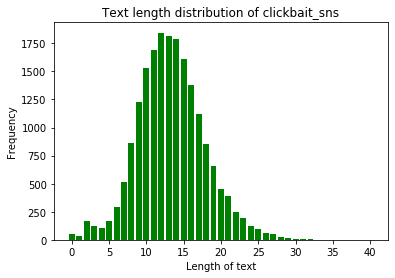

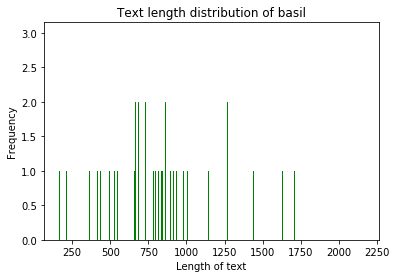

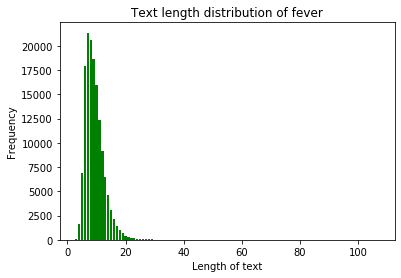

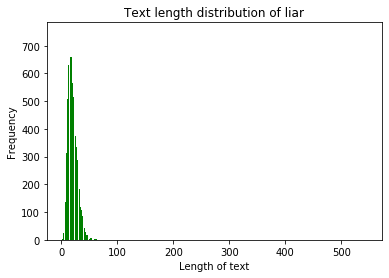

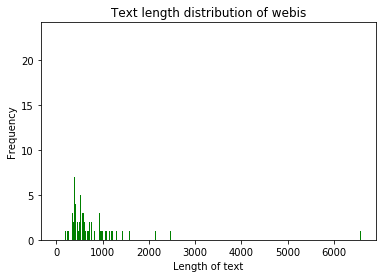

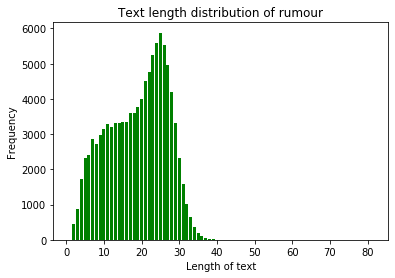

In [42]:
for text_arr, name in zip([clickbait_sns_text_data, basil_data_arr, fever_text_data, liar_data_text,
                          webis_text_arr, rumour_text_arr],['clickbait_sns', 'basil', 'fever','liar', 
                                                            'webis', 'rumour']):
    draw_sent_len_plot(text_arr, name)

load labels for each task

In [17]:
! ls /mnt/vol/gfsai-east/aml/users/nayeon7lee/preprocessed

clickbait_sns.pickle
event_to_thread_rumour_detection_dataset.pickle
event_to_thread_veracity_detection_dataset.pickle
id2text.pickle
id2tweet.pickle
liar_dev.pickle
liar_test.pickle
liar_train.pickle
npy_data
reply_stances_dataset.pickle
rumoureval_tweet_annotations.pickle
source_stance_dataset.pickle
thread2branches_by_event.pickle
thread2branches_by_event_split_branch.pickle
thread_annotations_by_event.json
thread_annotations.json
tweet_annotations.json
webis.pickle


In [10]:
with open('/home/nayeon7lee/misinfo_data/clickbait/truth.jsonl', 'r') as json_file:
    json_list = list(json_file)
    clickbait_sns_label = [json.loads(json_str)['truthClass'] for json_str in json_list]
    clickbait_sns_label = [0 if label=='no-clickbait' else 1 for label in clickbait_sns_label]

In [23]:
total = sum(Counter(clickbait_sns_label).values())
for key, count in Counter(clickbait_sns_label).items():
    print(key, count/total)

1 0.24367898454294196
0 0.756321015457058


In [8]:
fever_map = {'SUPPORTS': 1, 'REFUTES': 0, 'NOT ENOUGH INFO': 2}
with open('/home/nayeon7lee/misinfo_data/fever/train.jsonl', 'r') as json_file:
    json_list = list(json_file)
    fever_label = [json.loads(json_str)['label'] for json_str in json_list]
    fever_label = [fever_map[label] for label in fever_label]

In [24]:
total = sum(Counter(fever_label).values())
for key, count in Counter(fever_label).items():
    print(key, count/total)

1 0.550261603723642
0 0.20471092960419116
2 0.24502746667216688


In [13]:
liar_map = {'half-true': 0, 'false': 1, 'mostly-true': 2, 'barely-true': 3, 'true': 4, 'pants-fire': 5}
liar_data = load_liar(root_dir)
liar_label = [liar_map[d['label']] for d in liar_data]
print(Counter(liar_label))

Counter({0: 2627, 1: 2507, 2: 2454, 3: 2103, 4: 2053, 5: 1047})


In [25]:
total = sum(Counter(liar_label).values())
for key, count in Counter(liar_label).items():
    print(key, count/total)

1 0.1959971855210695
0 0.20537878195606285
2 0.19185364709561412
4 0.16050347900867798
3 0.16441247752325855
5 0.08185442889531702


In [16]:
webis_map = {'mostly true': 0,
         'no factual content': 1,
         'mixture of true and false': 2,
         'mostly false': 3}

webis_annotation = os.path.join(root_dir, 'webis/overview.csv')
webis_article_path = os.path.join(root_dir, 'webis/articles')
webis_articles = load_webis(webis_annotation, webis_article_path)
webis_label = [webis_map[a['veracity_label']] for a in webis_articles]
print(Counter(webis_label))

Counter({0: 1264, 2: 212, 3: 87, 1: 64})


In [26]:
total = sum(Counter(webis_label).values())
for key, count in Counter(webis_label).items():
    print(key, count/total)

0 0.7768899815611555
1 0.03933620159803319
2 0.13030116779348494
3 0.05347264904732637


In [18]:
with open("/mnt/vol/gfsai-east/aml/users/nayeon7lee/preprocessed/id2text.pickle", "rb") as input_file: 
    id2text = pickle.load(input_file)
rumour_text_arr = list(id2text.values())
# sorted_rumour_utokens = get_sorted_unique_tokens(rumour_text_arr, tokenizer, True)

In [77]:
def draw_label_plot(label_arr, data_name):
    c = Counter(label_arr)
    plt.bar(list(c.keys()), c.values(), color='g')
    plt.ylabel('Frequency')
    plt.xlabel('Classes')
    plt.title("Distribution of classes in {}".format(data_name))
    plt.show()

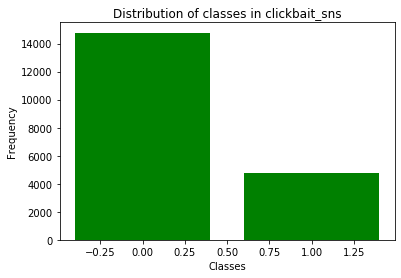

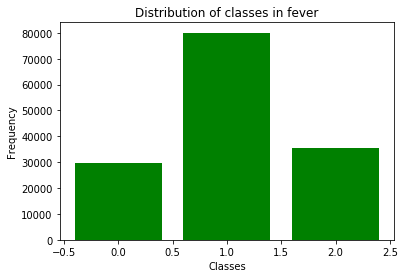

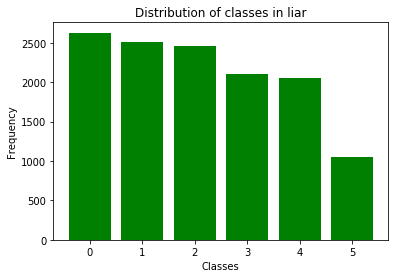

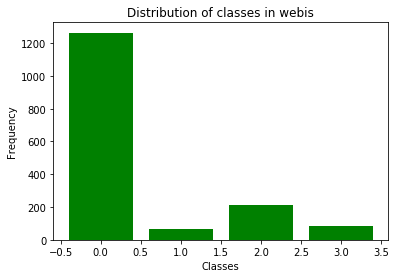

In [79]:
for label_arr, name in zip([clickbait_sns_label, fever_label, liar_label,
                          webis_label],['clickbait_sns', 'fever','liar', 
                                                            'webis']):
    draw_label_plot(label_arr, name)

### entropy and kurtosis

In [81]:
from scipy.stats import kurtosis, entropy
for label_arr, name in zip([clickbait_sns_label, fever_label, liar_label,
                          webis_label],['clickbait_sns', 'fever','liar', 
                                                            'webis']):
    kurt_score = kurtosis(label_arr)
    entropy_score = entropy(label_arr)
    
    print("{}: Kurtosis = {}, Entropy = {}".format(name, kurt_score, entropy_score))

clickbait_sns: Kurtosis = -0.5740503959608323, Entropy = 8.468213009194518
fever: Kurtosis = -0.7709004193384272, Entropy = 11.600589624932416
liar: Kurtosis = -1.1202596516585401, Entropy = 9.10053271780069
webis: Kurtosis = 1.3487311037888583, Entropy = 5.843529087789858
